<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a series of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [3]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [4]:
# Answer:
movies.shape
#979 rows, 6 columns

(979, 6)

#### Check the data type of each column.

In [5]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [6]:
# Answer:
movies.mean()

star_rating      7.889785
duration       120.979571
dtype: float64

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [7]:
# Answer:
movies.loc[:,'duration'].sort_values() # to get the shortest movies
movies.loc[:,'duration'].sort_values(ascending=False) # to get the longest movies

476    242
157    238
78     229
142    224
445    220
85     216
204    212
17     207
767    205
630    202
7      201
2      200
335    197
385    197
8      195
620    194
424    193
220    191
671    191
40     189
316    189
89     189
184    188
318    188
611    187
132    186
245    184
109    183
166    182
361    181
      ... 
766     83
759     83
174     83
306     82
595     82
330     81
789     81
738     81
541     81
117     81
622     80
297     80
283     80
533     80
853     80
513     80
535     79
489     78
864     78
713     78
303     76
405     75
938     75
351     70
742     69
88      68
293     68
258     67
338     66
389     64
Name: duration, Length: 979, dtype: int64

#### Create a histogram of duration, choosing an "appropriate" number of bins.

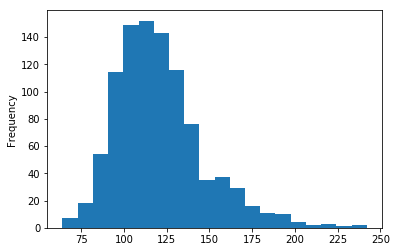

In [8]:
# Answer:
movies.loc[:,'duration'].plot(kind='hist', bins=20)

#### Use a box plot to display that same data.

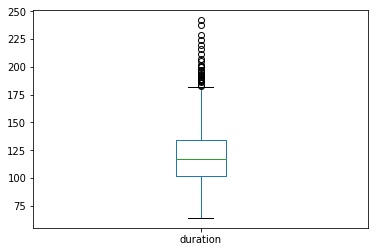

In [9]:
# Answer:
movies.loc[:,'duration'].plot(kind='box')

## Intermediate level

#### Count how many movies have each of the content ratings.

In [10]:
# Answer:
content_rating_category = movies.loc[:,'content_rating'].value_counts()
content_rating_category

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

Text(0, 0.5, '# of moview')

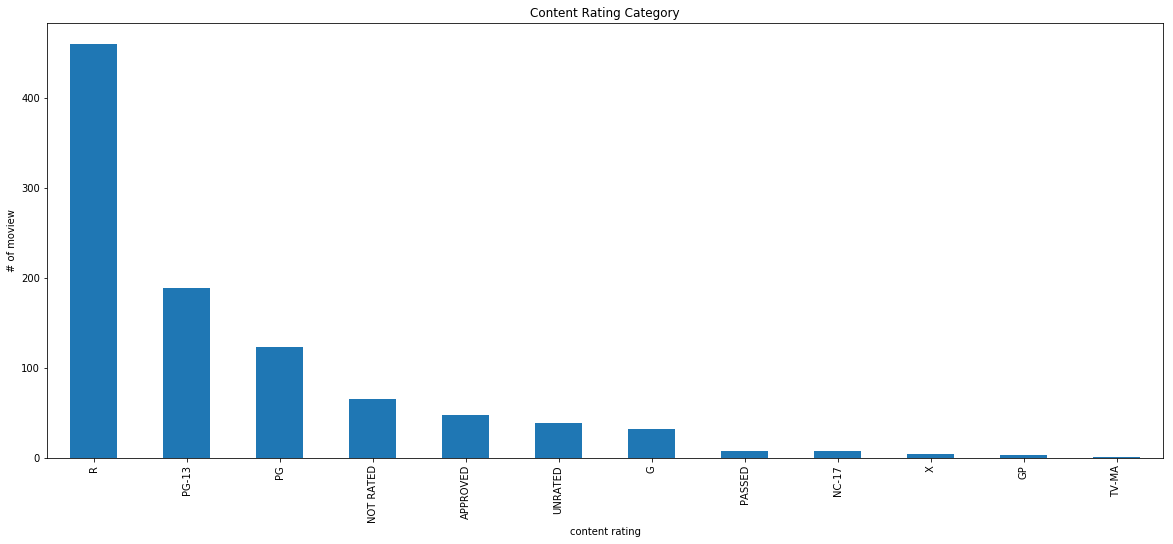

In [11]:
# Answer:
ax = content_rating_category.plot(kind='bar', figsize = (20,8))
ax.set_title('Content Rating Category')
ax.set_xlabel('content rating')
ax.set_ylabel('# of moview')

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [12]:
# Answer:
movies_rep = movies #create a duplicate of movie table incase we need data from the original table.
movies_rep = movies_rep.replace('NOT RATED','UNRATED')
movies_rep = movies_rep.replace('APPROVED','UNRATED')
movies_rep = movies_rep.replace('PASSED','UNRATED')
movies_rep = movies_rep.replace('GP','UNRATED')

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [13]:
# Answer:
movies_rep = movies_rep.replace('X','NC-17')
movies_rep = movies_rep.replace('TV-MA','NC-17')

#### Count the number of missing values in each column.

In [14]:
# Answer:
movies.isna().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [15]:
# Answer:
movies_rep.loc[movies_rep.loc[:,'content_rating'].isna(),:]
movies_rep.loc[:,'content_rating']=movies_rep.loc[:,'content_rating'].fillna(value='PG')

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [16]:
# Answer:
movies_rep.loc[movies_rep.loc[:,'duration'].apply(lambda duration: duration >= 120),'star_rating'].mean()

7.948898678414082

In [17]:
movies_rep.loc[movies_rep.loc[:,'duration'].apply(lambda duration: duration < 120),'star_rating'].mean()


7.838666666666657

#### Use a visualization to detect whether there is a relationship between duration and star rating.

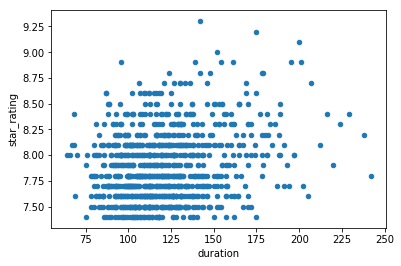

In [18]:
# Answer:
movies_rep.plot(kind='scatter',x='duration',y='star_rating')

#### Calculate the average duration for each genre.

In [19]:
# Answer:
movies_rep.groupby('genre').agg({'duration':'mean'})

,duration
genre,
Action,126.485294
Adventure,134.840000
Animation,96.596774
Biography,131.844156
Comedy,107.602564
Crime,122.298387
Drama,126.539568
Family,107.500000
Fantasy,112.000000


## Advanced level

#### Visualize the relationship between content rating and duration.

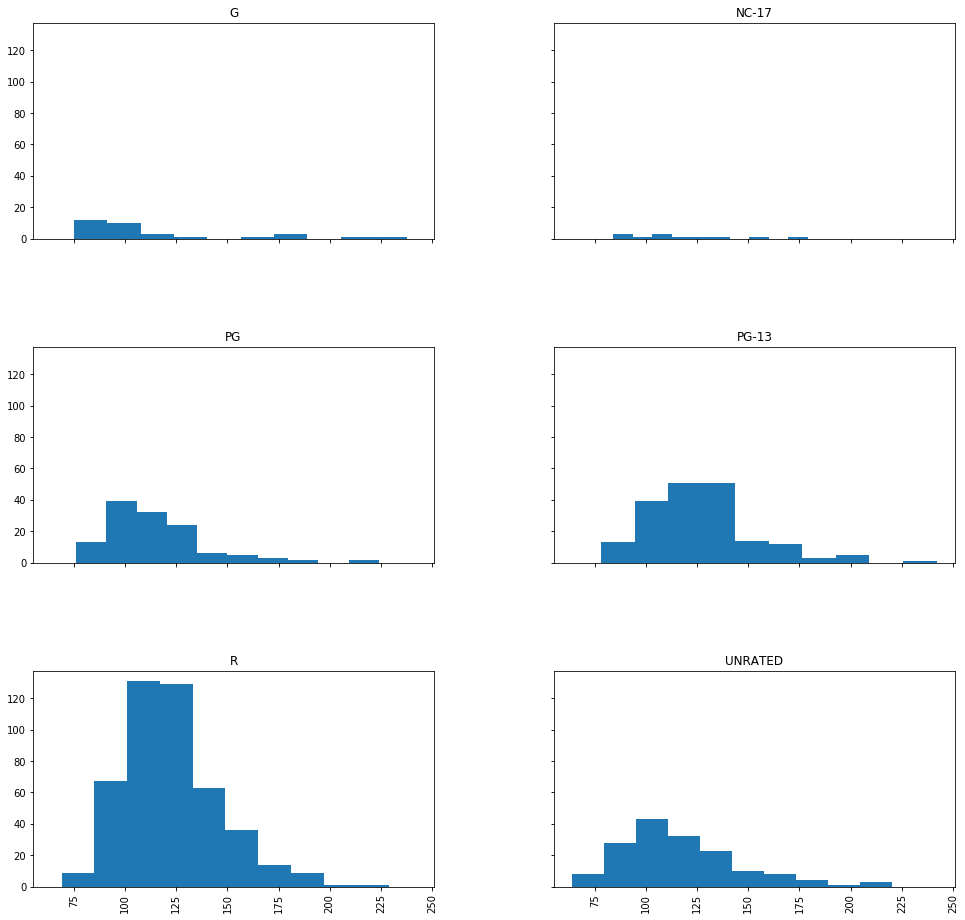

In [20]:
# Answer:
ax = movies_rep.hist(column = 'duration',by='content_rating', figsize=(16,16), sharex = True, sharey= True)

#### Find the title of the movie with the highest star rating in each genre

In [21]:
# Answer:
movies_rep.sort_values('star_rating', ascending=False).groupby('genre').title.first()

genre
Action                                     The Dark Knight
Adventure    The Lord of the Rings: The Return of the King
Animation                                    Spirited Away
Biography                                 Schindler's List
Comedy                                        Modern Times
Crime                             The Shawshank Redemption
Drama                                         12 Angry Men
Family                          E.T. the Extra-Terrestrial
Fantasy                          The City of Lost Children
Film-Noir                                    The Third Man
History                                Battleship Potemkin
Horror                                              Psycho
Mystery                                        Rear Window
Sci-Fi                                        Blade Runner
Thriller                                 Shadow of a Doubt
Western                     The Good, the Bad and the Ugly
Name: title, dtype: object

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [22]:
# Answer:
dupe_titles = movies_rep[movies_rep.title.duplicated()].title
movies_rep[movies_rep.title.isin(dupe_titles)] #no, they are not real duplicates

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,PG,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


**You only need to choose one of the options below.** However, solving for multiple options would count as "extra credit" that could e.g. raise your score from a 2 ("meets expectations") to a 3 ("exceeds expectations").

#### Option 1: manually create a list of relevant genres, then filter using that list

In [23]:
# Answer:
movies_rep.genre.value_counts()
qualified_genres = ['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure', 'Animation', 'Horror', 'Mystery']
movies_rep[movies_rep.genre.isin(qualified_genres)].groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [ ]:
# Answer:

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [24]:
# Answer:
movies_rep.groupby('genre').star_rating.mean()[movies_rep.genre.value_counts() >= 10]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [26]:
# Answer:
genre_agg = movies_rep.groupby('genre').star_rating.agg(['count', 'mean'])
genre_agg[genre_agg['count'] >= 10]

,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000


## Bonus

#### Figure out something "interesting" using the actors data!